In [71]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

In [72]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [73]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized_fetal/Interventricular septum.rds')

In [74]:
table(dataobj$cell_type)


Cardiomyocyte cell   Endothelial cell         Fibroblast          Mast cell 
                12                  8                 23                  1 
         Myelocyte 
                 8 

# CM

In [75]:
ct = "Cardiomyocyte cell"

In [76]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [77]:
df <- df[apply(df,1,mad)>0,]

In [78]:
dim(df)

[1] 1441   12

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

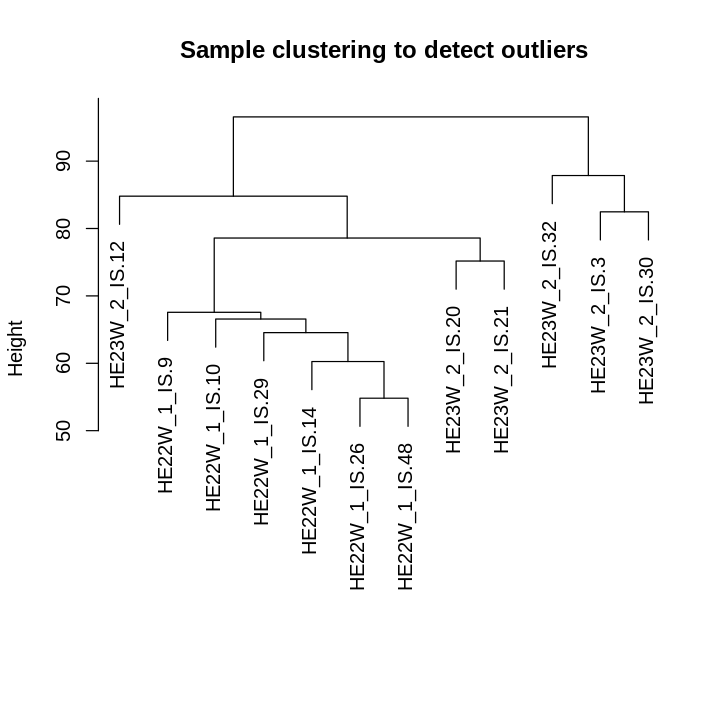

In [79]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [80]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 10 genes from module 1 because their KME is too low.
     ..removing 8 genes from module 2 because their KME is too low.
     ..removing 5 genes from module 3 because their KME is too low.
     ..removing 4 genes from module 4 because their KME is too low.
     ..removing 8 genes from module 5 because their KME is too low.
     ..removing 9 genes from module 6 because their KME is too low.
     ..removing 3 genes from module 8 because t

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


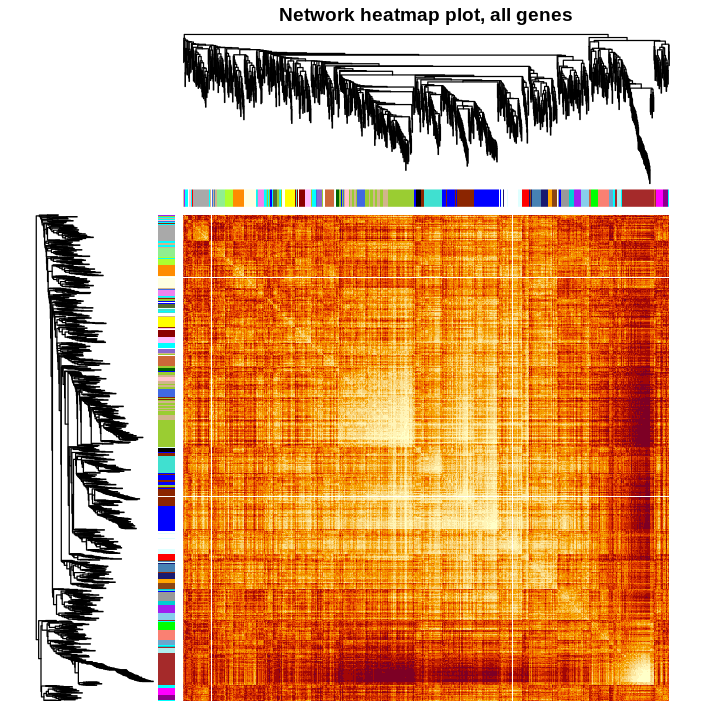

In [81]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

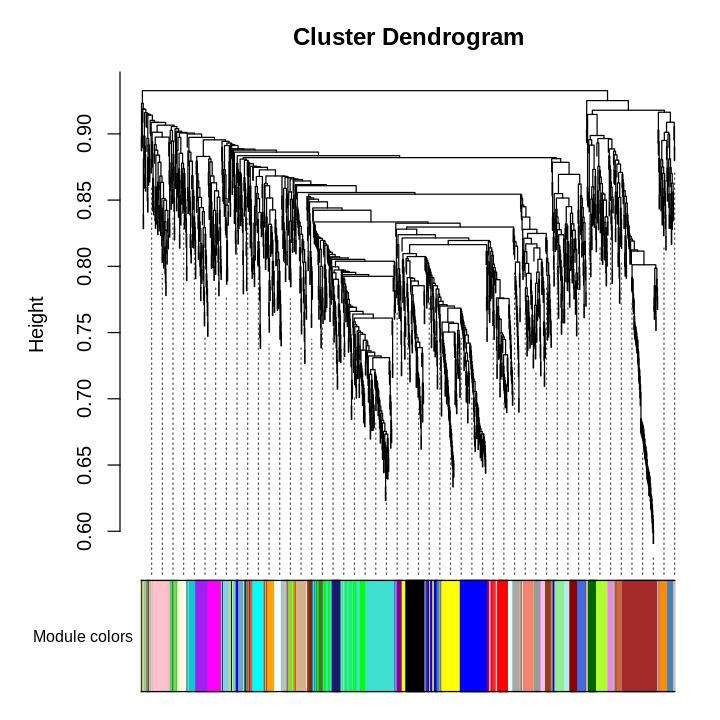

In [82]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [83]:
colors <- table(net$colors)
colors


         black           blue          brown           cyan      darkgreen 
            61            122            102             29             22 
      darkgrey    darkmagenta darkolivegreen     darkorange        darkred 
            21             15             15             20             23 
 darkturquoise          green    greenyellow           grey         grey60 
            21             67             31             69             27 
     lightcyan     lightgreen    lightyellow        magenta   midnightblue 
            28             26             25             36             29 
        orange     orangered4  paleturquoise           pink          plum1 
            21             10             16             47             12 
        purple            red      royalblue    saddlebrown         salmon 
            33             66             23             17             29 
       sienna3        skyblue       skyblue3      steelblue            tan 
           

In [84]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [87]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','IVS/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Fb

In [88]:
ct = "Fibroblast"

In [89]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [90]:
df <- df[apply(df,1,mad)>0,]

In [91]:
dim(df)

[1] 2125   23

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

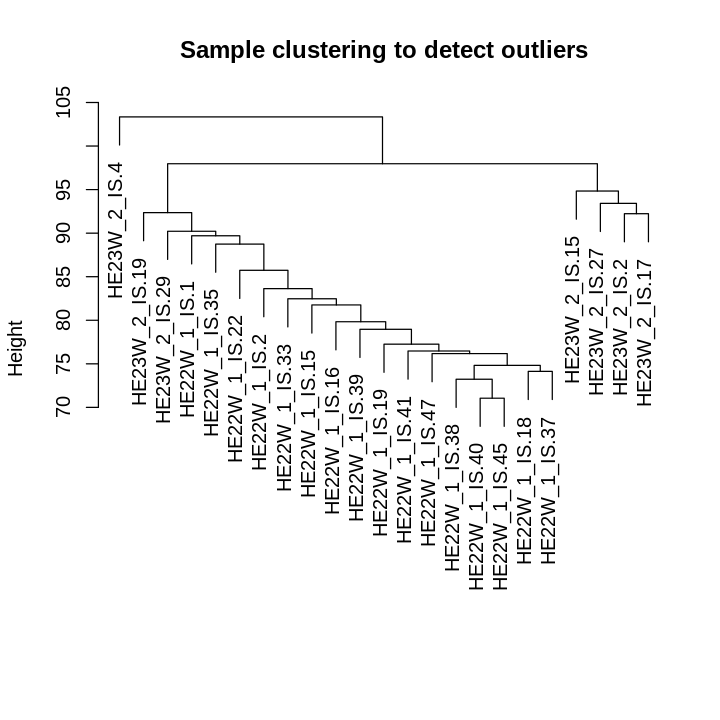

In [92]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [93]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 70 genes from module 1 because their KME is too low.
     ..removing 37 genes from module 2 because their KME is too low.
     ..removing 18 genes from module 3 because their KME is too low.
     ..removing 26 genes from module 4 because their KME is too low.
     ..removing 50 genes from module 5 because their KME is too low.
     ..removing 13 genes from module 6 because their KME is too low.
     ..removing 15 genes from module 7 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


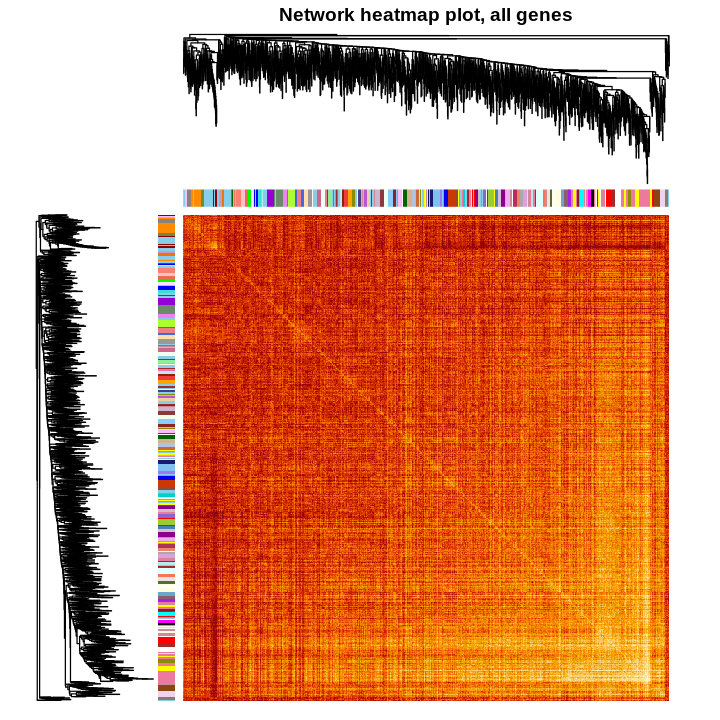

In [94]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

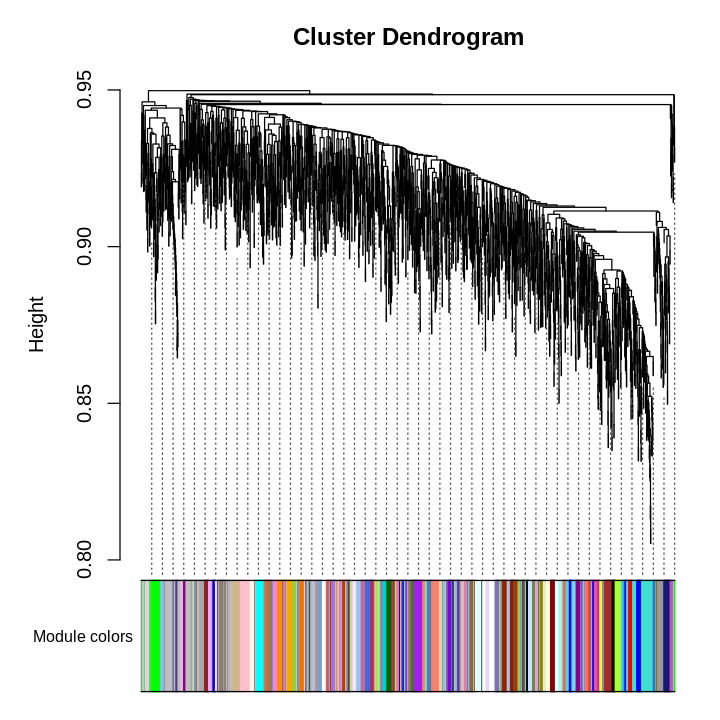

In [95]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [96]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           blue2 
             13              15              40              94              11 
          brown          brown2          brown4          coral1          coral2 
             57              12              16              14              13 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
             30              20              20              18              18 
darkolivegreen4      darkorange     darkorange2         darkred   darkseagreen4 
             12              19              16              21              14 
  darkslateblue   darkturquoise      darkviolet      firebrick4     floralwhite 
             15              20              11              12              16 
          green     greenyellow            grey          grey60       honeydew1 
             46              32             282              25              14 
     indianred4           i

In [97]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [98]:
i = 1
for (c in names(colors)){
    if(! c=="grey"){
        googene <- colnames(datExpr_filted)[net$colors == c]
        TOMp <- TOM[googene,googene]
        df_ct=TOMp
        df_ct <- df_ct -diag(dim(df_ct)[1])
        if(dim(df_ct)[1]>=2){
            write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','IVS/',ct,'.',i,'.csv'))
            i = i + 1
    }
    }
}

# EC

In [99]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [100]:
df <- df[apply(df,1,mad)>0,]

In [101]:
dim(df)

[1] 2125   23

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

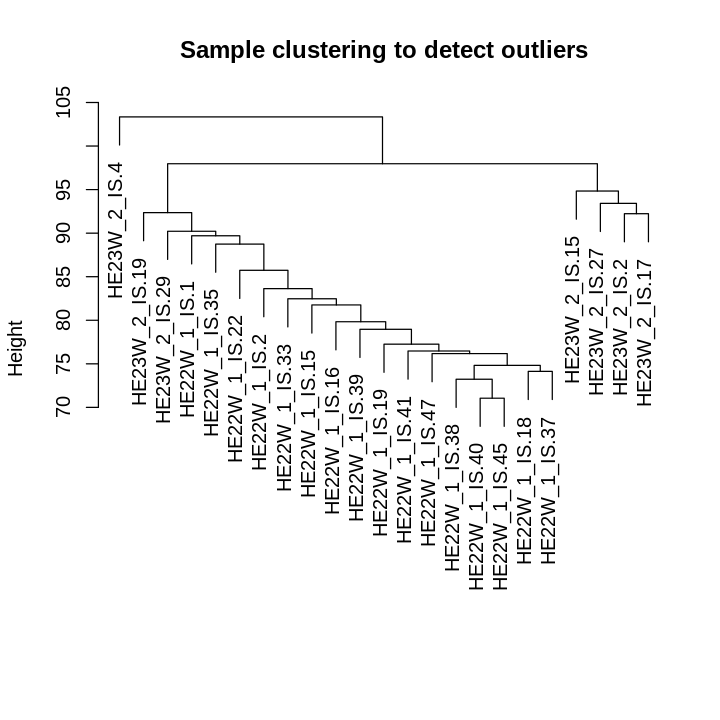

In [102]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [103]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 70 genes from module 1 because their KME is too low.
     ..removing 37 genes from module 2 because their KME is too low.
     ..removing 18 genes from module 3 because their KME is too low.
     ..removing 26 genes from module 4 because their KME is too low.
     ..removing 50 genes from module 5 because their KME is too low.
     ..removing 13 genes from module 6 because their KME is too low.
     ..removing 15 genes from module 7 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


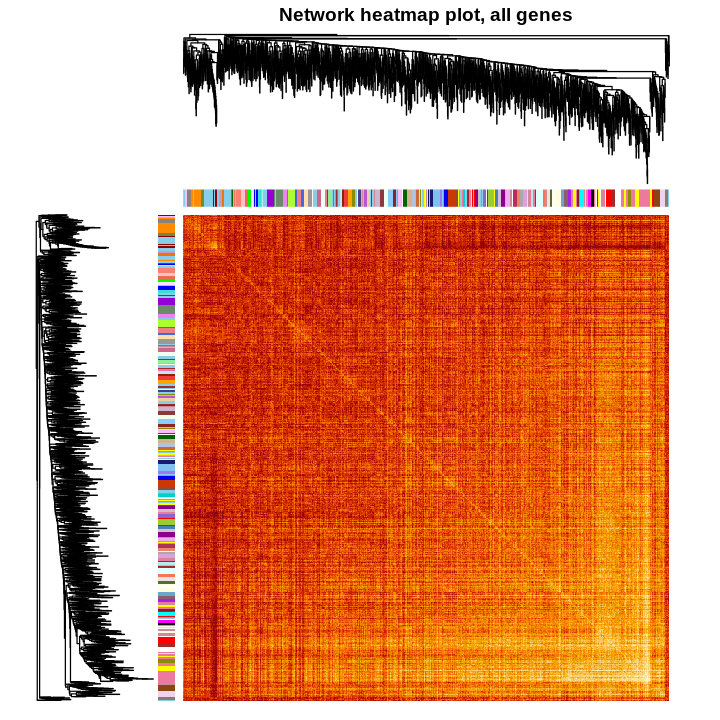

In [104]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

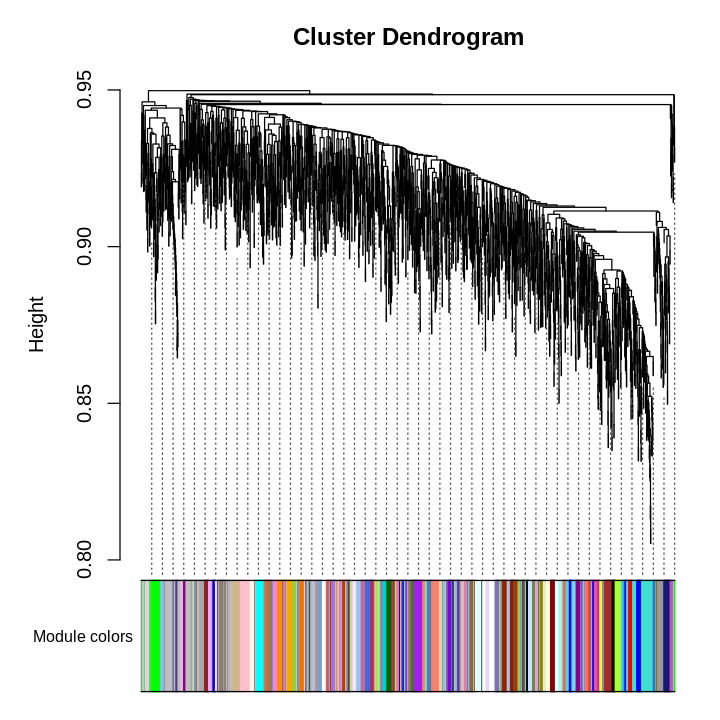

In [105]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [106]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           blue2 
             13              15              40              94              11 
          brown          brown2          brown4          coral1          coral2 
             57              12              16              14              13 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
             30              20              20              18              18 
darkolivegreen4      darkorange     darkorange2         darkred   darkseagreen4 
             12              19              16              21              14 
  darkslateblue   darkturquoise      darkviolet      firebrick4     floralwhite 
             15              20              11              12              16 
          green     greenyellow            grey          grey60       honeydew1 
             46              32             282              25              14 
     indianred4           i

In [107]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [108]:
i = 1
for (c in names(colors)){
    if(! c=="grey"){
        googene <- colnames(datExpr_filted)[net$colors == c]
        TOMp <- TOM[googene,googene]
        df_ct=TOMp
        df_ct <- df_ct -diag(dim(df_ct)[1])
        if(dim(df_ct)[1]>=2){
            write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','IVS/',ct,'.',i,'.csv'))
            i = i + 1
    }
    }
}

# Myelo

In [109]:
ct = "Myelocyte"

In [110]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [111]:
df <- df[apply(df,1,mad)>0,]

In [112]:
dim(df)

[1] 2665    8

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

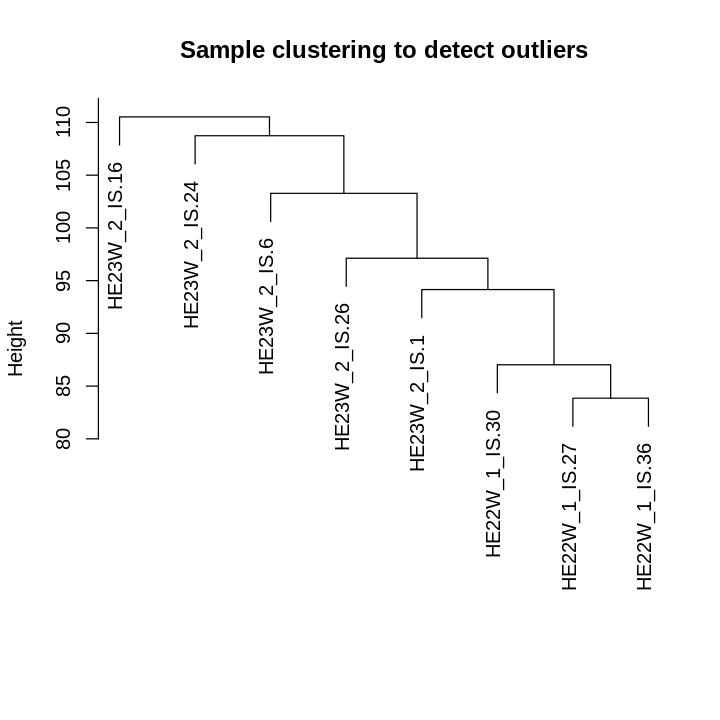

In [113]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [114]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


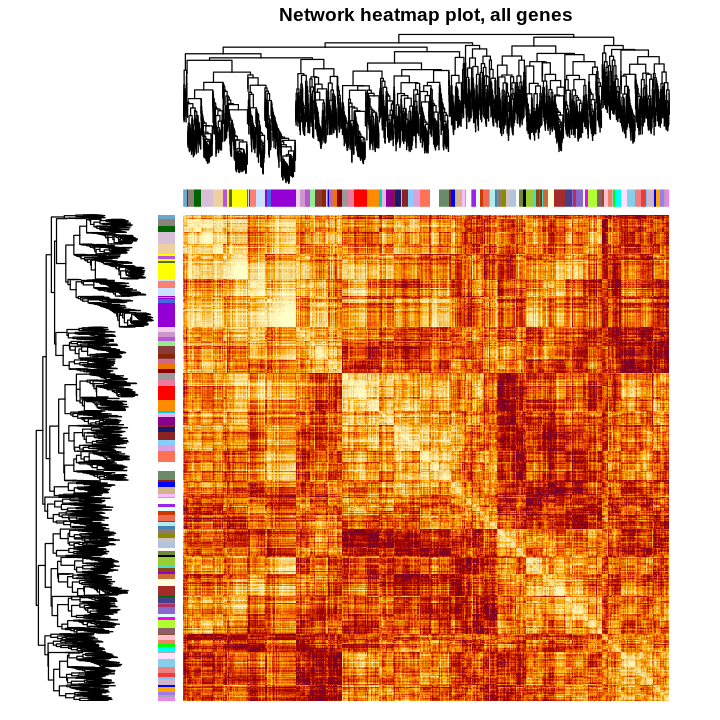

In [115]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

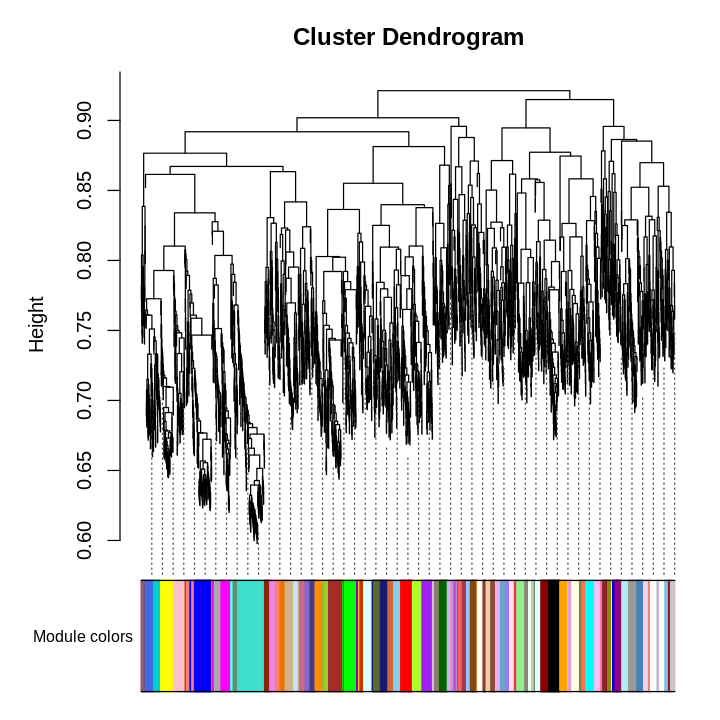

In [116]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [117]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           blue2 
             20              25              58              99              13 
          brown          brown2          brown4          coral1          coral2 
             79              13              25              20              20 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
             46              39              37              31              32 
darkolivegreen4      darkorange     darkorange2         darkred   darkseagreen4 
             13              37              26              39              21 
  darkslateblue   darkturquoise      darkviolet      firebrick4     floralwhite 
             25              38              12              13              26 
          green     greenyellow          grey60       honeydew1      indianred4 
             64              49              43              21              14 
          ivory  lavenderbl

In [118]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [119]:
i = 1
for (c in names(colors)){
    if(! c=="grey"){
        googene <- colnames(datExpr_filted)[net$colors == c]
        TOMp <- TOM[googene,googene]
        df_ct=TOMp
        df_ct <- df_ct -diag(dim(df_ct)[1])
        if(dim(df_ct)[1]>=2){
            write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','IVS/',ct,'.',i,'.csv'))
            i = i + 1
    }
    }
}